In [1]:
import pandas as pd

In [2]:
df_complaints_accused = pd.read_csv("./unified_data/complaints/complaints-accused.csv")

/var/folders/99/1_yqvr2s1gj6fysmtgqy_n_c0000gn/T/ipykernel_2956/4037217404.py:1: DtypeWarning: Columns (0,9,10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df_complaints_accused = pd.read_csv("./unified_data/complaints/complaints-accused.csv")


In [3]:
df_complaints_accused.columns

Index(['cr_id', 'UID', 'complaint_category', 'complaint_code', 'cv', 'days',
       'filename', 'final_finding', 'final_outcome', 'final_outcome_desc',
       'finding_cd', 'recc_finding', 'recc_outcome', 'cvs', 'filenames',
       'complaint_codes', 'complaint_categories', 'disciplined'],
      dtype='object')

In [19]:
df_complaints_accused.final_outcome.value_counts()

final_outcome
No Action Taken                                             201395
No Action Taken / Not Sustained / Exonerated / Unfounded     10243
Reprimand                                                     6768
Unknown                                                       6399
1 Day Suspension                                              4822
                                                             ...  
35 Day Suspension                                                1
65 Day Suspension                                                1
016                                                              1
024                                                              1
40                                                               1
Name: count, Length: 66, dtype: int64

In [25]:
# Filter DataFrame for rows where 'recc_outcome' is "No Action Taken"
#filtered_df = df_complaints_accused[df_complaints_accused['final_outcome'] == "No Action Taken"]

#filtered_df = df_complaints_accused[df_complaints_accused['final_outcome'] == "Administrative Termination"]
filtered_df = df_complaints_accused[df_complaints_accused['final_outcome'] == "Reprimand"]
# Select only the 'complaint_category' column
complaint_categories_filtered = filtered_df[['complaint_category']]

# Display the result
#import ace_tools as tools
#tools.display_dataframe_to_user(name="Filtered Complaint Categories", dataframe=complaint_categories_filtered)

In [26]:
len(filtered_df.complaint_category)

6768

In [54]:
len(df_complaints_accused.complaint_category.dropna().unique())

758

In [51]:
#df_complaints_accused.complaint_category.value_counts()
# Count occurrences of each complaint category
value_counts = df_complaints_accused['complaint_category'].dropna().value_counts()

# Rank values based on count (1 = most frequent)
ranked_values = value_counts.rank(method='dense', ascending=False).astype(int)

# Create a DataFrame with rankings
ranking_df = pd.DataFrame({
        'Complaint_Category': value_counts.index,
        'Count': value_counts.values,
        'Rank': ranked_values.values
    })

    # Get the top N complaint categories
top_ranking_df = ranking_df.head(10)

In [52]:
top_ranking_df

,Complaint_Category,Count,Rank
0,Excessive Force,23797,1
1,EXCESSIVE FORCE: ARRESTEE - DURING ARREST,17377,2
2,MISCELLANEOUS,14348,3
3,CIVIL RIGHTS VIOLATION: SEARCH OF PREMISE/VEH...,10337,4
4,INADEQUATE/FAILURE TO PROVIDE SERVICE,9467,5
5,SEARCH OF PREMISE WITHOUT WARRANT,8349,6
6,OPERATION/PERSONNEL VIOLS.: NEGLECT OF DUTY /...,6894,7
7,OPERATION/PERSONNEL VIOLATION: MISCELLANEOUS,6624,8
8,OPERATION/PERSONNEL VIOLATION: INADEQUATE/FAIL...,6590,9
9,INADEQUATE / FAILURE TO PROVIDE SERVICE,6577,10


In [19]:
df_complaints_accused.complaint_category.unique()

array(['UNNECESSARY PHYSICAL CONTACT - OFF DUTY', 'Excessive Force',
       'Fourth Amendment/Improper Search', 'MISCELLANEOUS',
       'TELEPHONE / ATTORNEY / RELATIVE PRIVILEGES',
       'EXCESSIVE DETENTION - AFTER ARREST', 'NEGLECT OF DUTY',
       'ILLEGAL ARREST / FALSE ARREST', 'ILLEGAL ARREST',
       'Domestic Violence', 'REPORTS - FAILED TO SUBMIT/IMPROPER',
       'IMPROPER SEARCH OF PERSON ', 'ARRESTEE - DURING ARREST',
       'WEAPON IRREGULARITY', 'SEARCH OF PREMISE/VEHICLE WITHOUT WARRANT',
       'INADEQUATE/FAILURE TO PROVIDE SERVICE',
       'SEARCH OF PERSON WITHOUT WARRANT',
       'SEARCH OF PERSON - PROPERTY / USC TAKEN',
       'FAIL TO OBTAIN A COMPLAINT REGISTER NUMBER', 'IMPROPER',
       'FAIL TO SUBMIT', 'MISUSE OF DEPARTMENT EQUIPMENT/SUPPLIES',
       'Operational Violation', 'INVENTORY PROCEDURES',
       'ACCIDENT - INJURY', 'Verbal Abuse',
       'UNNECESSARY PHYSICAL CONTACT - ON DUTY',
       'MISCONDUCT DURING ISSUANCE OF CITATION', 'USE OF PROFANITY

In [27]:
df_complaints_complaints = pd.read_csv("./unified_data/complaints/complaints-complaints.csv")

/var/folders/99/1_yqvr2s1gj6fysmtgqy_n_c0000gn/T/ipykernel_2956/2642515739.py:1: DtypeWarning: Columns (0,1,2,4,6,11,12,13,14,15,16,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df_complaints_complaints = pd.read_csv("./unified_data/complaints/complaints-complaints.csv")


In [28]:
df_complaints_complaints.columns

Index(['cr_id', 'beat', 'case_type', 'closed_date', 'complainant_type',
       'complaint_date', 'current_status', 'cv', 'days_to_closure', 'filename',
       'incident_date', 'incident_time', 'investigating_agency', 'location',
       'location_code', 'cvs', 'investigating_agencies', 'filenames',
       'latitude', 'longitude', 'old_complaint_address', 'add1', 'add2'],
      dtype='object')

In [31]:
df_complaints_complaints.head()

,cr_id,beat,case_type,closed_date,complainant_type,complaint_date,current_status,cv,days_to_closure,filename,...,location,location_code,cvs,investigating_agencies,filenames,latitude,longitude,old_complaint_address,add1,add2
0,93392,NaN,NaN,9/2/78,NaN,6/10/77,NaN,1,NaN,complaints-complaints_1967-1999_2016-12,...,NaN,NaN,1,NaN,complaints-complaints_1967-1999_2016-12,41.947294,-87.650704,RETA & ADDISON,NaN,NaN
1,58264,NaN,NaN,7/27/87,NaN,12/22/71,NaN,1,NaN,complaints-complaints_1967-1999_2016-12,...,NaN,NaN,1,NaN,complaints-complaints_1967-1999_2016-12,NaN,NaN,UNK,NaN,NaN
2,58189,NaN,NaN,7/29/87,NaN,12/19/71,NaN,1,NaN,complaints-complaints_1967-1999_2016-12,...,NaN,NaN,1,NaN,complaints-complaints_1967-1999_2016-12,41.827202,-87.638704,37TH AND NORMAL,NaN,NaN
3,56104,NaN,NaN,3/20/87,NaN,8/9/71,NaN,1,NaN,complaints-complaints_1967-1999_2016-12,...,NaN,NaN,1,NaN,complaints-complaints_1967-1999_2016-12,41.716714,-87.617943,97XX SO. PRAIRIE,NaN,NaN
4,560313,NaN,NaN,NaN,CIVILIAN,7/22/20,FINAL/COMPLETED,7,NaN,complaints-complaints-clear_2000-2020_2020-07,...,NaN,NaN,7,NaN,complaints-complaints-clear_2000-2020_2020-07,NaN,NaN,NaN,NaN,NaN


In [34]:
#df_complaints_complaints.add2.value_counts()
# Get the count of each unique value in 'complaint_category'
category_counts = df_complaints_complaints['add2'].value_counts()

# Print all values without truncation
print(category_counts.to_string())  


add2
CHICAGO IL                                                               58083
CHICAGO IL 60628                                                          3881
CHICAGO IL 60620                                                          3782
CHICAGO IL 60624                                                          2942
CHICAGO IL 60619                                                          2885
CHICAGO IL 60636                                                          2884
CHICAGO IL 60617                                                          2822
CHICAGO IL 60609                                                          2774
CHICAGO IL 60637                                                          2692
CHICAGO IL 60644                                                          2678
CHICAGO IL 60623                                                          2526
CHICAGO IL 60651                                                          2375
CHICAGO IL 60612                               

In [37]:
city_names_df = (df_complaints_complaints[df_complaints_complaints['add2'].str.contains(r"\bIL\b", na=False, regex=True)]
                 .assign(City=lambda x: x['add2'].str.extract(r"^(.*?)\s+IL\b", expand=True))
                 [['City']].dropna().drop_duplicates().reset_index(drop=True))

city_names_df.value_counts()

City          
.CHICAGO          1
NORTHLAKE         1
OAKFOREST         1
OAKBROOK          1
OAK PARK          1
                 ..
EVERGRENN         1
EVERGREENPARK     1
EVERGREEN PK      1
EVERGREEN PARK    1
ZION              1
Name: count, Length: 438, dtype: int64

In [38]:
city_counts_df = (df_complaints_complaints[df_complaints_complaints['add2'].str.contains(r"\bIL\b", na=False, regex=True)]
                  .assign(City=lambda x: x['add2'].str.extract(r"^(.*?)\s+IL\b", expand=True))
                  .groupby('City')
                  .size()
                  .reset_index(name='Count')
                  .sort_values(by='Count', ascending=False))
city_counts_df

,City,Count
75,CHICAGO,154895
296,OAK LAWN,88
297,OAK PARK,70
86,CICERO,68
136,EVANSTON,66
...,...,...
190,HIGHLAND PK,1
187,HIAWATHA PK,1
186,HERSCHER,1
185,HENNEPIN,1


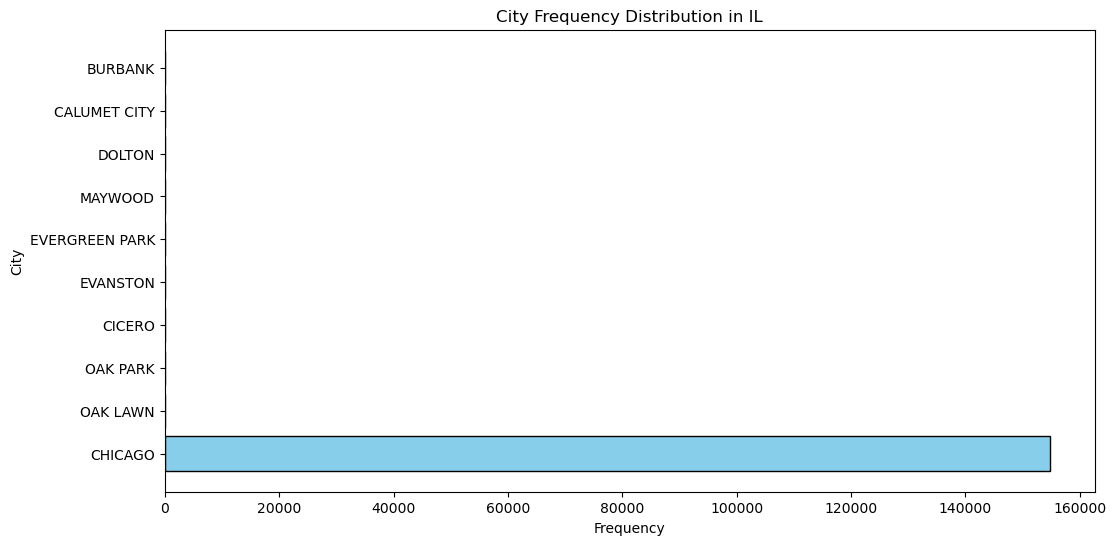

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract and count city occurrences in IL
city_counts_df = (df_complaints_complaints[df_complaints_complaints['add2'].str.contains(r"\bIL\b", na=False, regex=True)]
                  .assign(City=lambda x: x['add2'].str.extract(r"^(.*?)\s+IL\b", expand=True))
                  .groupby('City')
                  .size()
                  .reset_index(name='Count')
                  .sort_values(by='Count', ascending=False))  # Sorting for better visualization

top_10_cities_df = city_counts_df.head(10)
top_10_cities_df

# Plot a horizontal bar chart (histogram) for city frequency in IL
plt.figure(figsize=(12, 6))
plt.barh(top_10_cities_df['City'], top_10_cities_df['Count'], color='skyblue', edgecolor='black')
plt.xlabel("Frequency")
plt.ylabel("City")
plt.title("City Frequency Distribution in IL")
plt.show()


In [42]:
city_counts_df

,City,Count
0,.CHICAGO,1
250,MATTESSON,1
248,MATTERSON,1
247,MARRIONETTE PARK,1
246,MARRIONETTE,1
...,...,...
136,EVANSTON,66
86,CICERO,68
297,OAK PARK,70
296,OAK LAWN,88


In [31]:
df_complaints_complaints.complainant_type.unique()

array([nan, 'CIVILIAN', 'CPD EMPLOYEE'], dtype=object)

In [56]:
#df_complaints_accused.complaint_category.value_counts()
# Count occurrences of each complaint category
value_counts = df_complaints_complaints['complainant_type'].dropna().value_counts()

# Rank values based on count (1 = most frequent)
ranked_values = value_counts.rank(method='dense', ascending=False).astype(int)

# Create a DataFrame with rankings
ranking_df = pd.DataFrame({
        'Complaint_Category': value_counts.index,
        'Count': value_counts.values,
        'Rank': ranked_values.values
    })

    # Get the top N complaint categories
top_ranking_df = ranking_df.head(10)


In [57]:
top_ranking_df

,Complaint_Category,Count,Rank
0,CIVILIAN,158288,1
1,CPD EMPLOYEE,11840,2


In [40]:
import gzip

gz_file = "./unified_data/complaints/civilian_witnesses.csv.gz"

# with gzip.open(gz_file, 'rt') as f:  # 'rt' mode for text
#     content = f.read()
#     print(content) 

# Read directly into a DataFrame
df_civilian_witnesses = pd.read_csv(gz_file, compression='gzip')
df_civilian_witnesses

,cr_id,birth_year,current_age,gender,race,filename
0,52094,1988,NaN,NaN,NaN,complaints-witnesses_1967-1999_2016-12
1,100256,1946,NaN,NaN,NaN,complaints-witnesses_1967-1999_2016-12
2,100256,1958,NaN,NaN,NaN,complaints-witnesses_1967-1999_2016-12
3,104195,1957,NaN,NaN,NaN,complaints-witnesses_1967-1999_2016-12
4,107181,1948,NaN,NaN,NaN,complaints-witnesses_1967-1999_2016-12
...,...,...,...,...,...,...
91832,314493,NaN,NaN,MALE,NaN,complaints-civilian-witnesses_2000-2023_2023-0...
91833,314752,1935.0,NaN,MALE,ASIAN/PACIFIC ISLANDER,complaints-civilian-witnesses_2000-2023_2023-0...
91834,315021,NaN,NaN,NaN,NaN,complaints-civilian-witnesses_2000-2023_2023-0...
91835,315093,NaN,NaN,MALE,NaN,complaints-civilian-witnesses_2000-2023_2023-0...


In [27]:
gz_file2 = "./unified_data/complaints/complainants.csv.gz"
df_complainants = pd.read_csv(gz_file, compression='gzip')
df_complainants.columns

Index(['cr_id', 'birth_year', 'current_age', 'gender', 'race', 'filename'], dtype='object')

In [37]:
import matplotlib.pyplot as plt
def draw_histogram(dataframe, column_name):
    # Drop rows where 'Values' column has NaN
    df_cleaned = dataframe.dropna(subset=[column_name])

    # Convert to numeric (if needed)
    #df_cleaned['Values'] = pd.to_numeric(df_cleaned['Values'])

    # Plot histogram
    plt.figure(figsize=(8, 5))
    plt.hist(df_cleaned[column_name], bins=5, edgecolor='black', alpha=0.7)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Histogram of Values (After Dropping NaNs)')
    plt.show()

In [2]:
import pandas as pd
df_final_profiles = pd.read_csv("./unified_data/profiles/final-profiles.csv")

/var/folders/99/1_yqvr2s1gj6fysmtgqy_n_c0000gn/T/ipykernel_7073/4270250487.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_final_profiles = pd.read_csv("./unified_data/profiles/final-profiles.csv")


In [11]:
df_final_profiles.columns


Index(['UID', 'first_name', 'last_name', 'middle_initial', 'middle_initial2',
       'suffix_name', 'birth_year', 'race', 'gender', 'appointed_date',
       'resignation_date', 'current_status', 'current_star', 'current_unit',
       'current_rank', 'start_date', 'org_hire_date', 'foia_names', 'matches',
       'profile_count', 'officer_id', 'matched_on', 'matched_to', 'merge_name',
       'original_rank', 'cleaned_rank', 'age'],
      dtype='object')

In [21]:
s = df_final_profiles["cleaned_rank"].dropna().value_counts().to_dict()

In [27]:
# for key,value in s.items():
#     print(key,value)

value_counts = df_final_profiles["cleaned_rank"].dropna().value_counts()

# Rank values based on count (1 = most frequent)
ranked_values = value_counts.rank(method='dense', ascending=False).astype(int)

# Create a DataFrame with rankings
ranking_df = pd.DataFrame({
        'Police officer ranks': value_counts.index,
        'Count': value_counts.values,
        'Rank': ranked_values.values
    })

    # Get the top N complaint categories
top_ranking_df = ranking_df.head(10)

In [28]:
top_ranking_df

,Police officer ranks,Count,Rank
0,POLICE OFFICER,24757,1
1,SERGEANT,4104,2
2,DETECTIVE,3672,3
3,LIEUTENANT,1133,4
4,POLICE OFFICER/FIELD TRAINING OFFICER,497,5
5,CAPTAIN,391,6
6,POLICE OFFICER ASSIGNED AS EVIDENCE TECHNICIAN,322,7
7,POLICE OFFICER/MOUNTED PAT OFFICER,190,8
8,POLICE OFFICER (PER ARBITRATION AWARD),158,9
9,COMMANDER,150,10


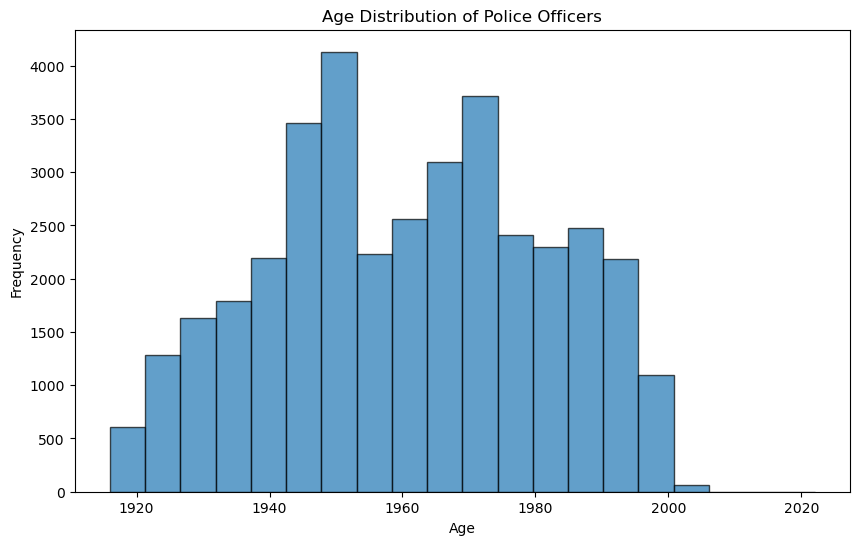

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

# Calculate age from 'birth year'
# current_year = datetime.now().year
# df_final_profiles['age'] = current_year - df_final_profiles['birth_year']

# # Drop NaN values and convert age to integer
# df_final_profiles = df_final_profiles.dropna(subset=['age'])
# df_final_profiles['age'] = df_final_profiles['age'].astype(int)

# Plot the age distribution histogram
plt.figure(figsize=(10, 6))
plt.hist(df_final_profiles['birth_year'], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution of Police Officers")
plt.show()


In [34]:
df_final_profiles.cleaned_rank.unique()

array([nan, 'POLICE OFFICER', 'SERGEANT', 'DETECTIVE',
       'POLICE OFFICER/FIELD TRAINING OFFICER',
       'POLICE OFFICER ASSIGNED AS EXPLOSIVES DETECTION CANINE HANDLER',
       'COMM OF GENERAL SUPPORT',
       'POLICE OFFICER ASSIGNED AS EVIDENCE TECHNICIAN', 'LIEUTENANT',
       'EXPLOSIVES TECHNICIAN I', 'DEPUTY CHIEF',
       'POLICE OFFICER (PER ARBITRATION AWARD)',
       'POLICE OFFICER/MARINE OFFICER', 'COMMANDER', 'CAPTAIN',
       'POLICE OFFICER/MOUNTED PAT OFFICER',
       'POLICE OFFICER ASSIGNED AS SECURITY SPECIALIST',
       'POLICE OFFICER FORENSIC INVESTIGATOR I',
       'FIRST DEPUTY SUPERINTENDENT', 'POLICE OFFICER LAB TECHNICIAN II',
       'POLICE OFFICER ASSIGNED AS CANINE HANDLER',
       'SENIOR EVIDENCE TECH', 'ASSISTANT DEPUTY SUPERVISOR',
       'ASSISTANT DEPUTY SUPERINTENDENT', 'CHIEF',
       'DEPUTY SUPERINTENDENT',
       'POLICE OFFICER ASSIGNED AS YOUTH OFFICER', 'OTHER',
       'POLICE OFFICER ASSIGNED AS SUPERVISING POLICE OFFICER INVESTIGATOR

In [59]:
df_final_profiles

,UID,first_name,last_name,middle_initial,middle_initial2,suffix_name,birth_year,race,gender,appointed_date,...,org_hire_date,foia_names,matches,profile_count,officer_id,matched_on,matched_to,merge_name,original_rank,cleaned_rank
0,100001,A,BRODERSON,F,NaN,NaN,1926.0,White,M,6/3/50,...,6/3/50,"unit-history__2016-03_, roster_1936-2017_2017-...","roster_1936-2017_2017-04: , unit-history__2016...",3,2863,data_id-foia_name-first_name_NS-last_name_NS-a...,officer_id,FOIA Data ID Merge,NaN,NaN
1,100002,A,DALESSANDRO,A,NaN,NaN,1923.0,White,M,9/1/56,...,9/1/56,"unit-history__2016-03_, roster_1936-2017_2017-...","roster_1936-2017_2017-04: , unit-history__2016...",3,6100,data_id-foia_name-first_name_NS-last_name_NS-a...,officer_id,FOIA Data ID Merge,NaN,NaN
2,100003,A,KIBURAS,J,NaN,NaN,1948.0,White,M,6/24/68,...,6/24/68,"unit-history__2016-03_, roster_1936-2017_2017-...","roster_1936-2017_2017-04: , unit-history__2016...",3,14560,data_id-foia_name-first_name_NS-last_name_NS-a...,officer_id,FOIA Data ID Merge,NaN,NaN
3,100004,A,KUSTRA,J,NaN,NaN,1923.0,White,M,9/28/53,...,9/28/53,"unit-history__2016-03_, roster_1936-2017_2017-...","roster_1936-2017_2017-04: , unit-history__2016...",3,15445,data_id-foia_name-first_name_NS-last_name_NS-a...,officer_id,FOIA Data ID Merge,NaN,NaN
4,100005,A,MC LAUGHLIN,R,NaN,NaN,1941.0,Black,M,6/20/66,...,6/20/66,"unit-history__2016-03_, roster_1936-2017_2017-...","roster_1936-2017_2017-04: , unit-history_2014-...",4,18373,data_id-foia_name-first_name_NS-last_name_NS-a...,officer_id,FOIA Data ID Merge,POLICE OFFICER,POLICE OFFICER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37540,137568,DION,REDFIELD,M,NaN,NaN,1964.0,Black,F,12/1/22,...,NaN,roster-inactive_2015-2024_2024-05_p944287,roster-inactive_2015-2024_2024-05_p944287:,1,37698,NaN,NaN,NaN,INVESTIGATIVE ANALYST,INVESTIGATIVE ANALYST
37541,137569,PEDRO,RODRIGUEZ,R,NaN,NaN,1962.0,Hispanic,M,9/16/19,...,NaN,roster-inactive_2015-2024_2024-05_p944287,roster-inactive_2015-2024_2024-05_p944287:,1,37699,NaN,NaN,NaN,INFORMATION/MEDIA RETRIEVAL SPECIALIST,INFORMATION/MEDIA RETRIEVAL SPECIALIST
37542,137570,JANET,TOLIVER,A,NaN,NaN,1956.0,Black,F,12/16/22,...,NaN,roster-inactive_2015-2024_2024-05_p944287,roster-inactive_2015-2024_2024-05_p944287:,1,37700,NaN,NaN,NaN,POLICE ADMINISTRATIVE CLERK,POLICE ADMINISTRATIVE CLERK
37543,137571,STANLEY,WILLIAMS,L,NaN,NaN,1966.0,Black,M,12/15/23,...,NaN,roster-inactive_2015-2024_2024-05_p944287,roster-inactive_2015-2024_2024-05_p944287:,1,37701,NaN,NaN,NaN,TRAINING OFFICER,TRAINING OFFICER


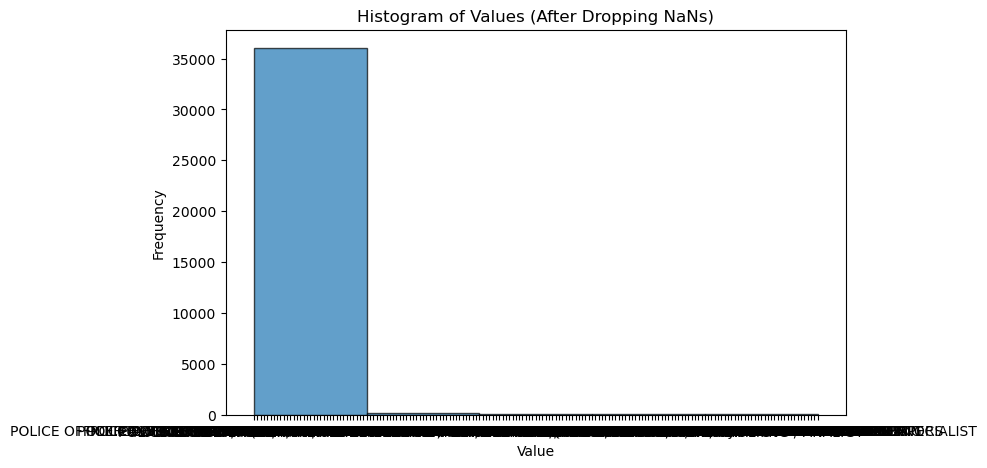

In [38]:
draw_histogram(df_final_profiles,"cleaned_rank")

In [52]:
df_victims = pd.read_csv("./unified_data/complaints/victims.csv")

In [59]:
df_victims

,cr_id,age,birth_year,gender,race,injury_condition,filename
0,1000000,NaN,1968.0,FEMALE,HISPANIC,NaN,complaints-victims-clear_2000-2019_2021-07_p21...
1,1000001,NaN,1985.0,MALE,BLACK,"INJURED, HOSPITALIZED, UNDER INFLUENCE",complaints-victims-clear_2000-2019_2021-07_p21...
2,1000002,NaN,1974.0,MALE,HISPANIC,UNKNOWN,complaints-victims-clear_2000-2019_2021-07_p21...
3,1000004,NaN,1956.0,MALE,HISPANIC,"NO VISIBLE INJURY, APPARENTLY NORMAL",complaints-victims-clear_2000-2019_2021-07_p21...
4,1000005,NaN,1982.0,FEMALE,BLACK,NaN,complaints-victims-clear_2000-2019_2021-07_p21...
...,...,...,...,...,...,...,...
146820,313163,NaN,1977.0,FEMALE,WHITE,NaN,complaints-victims_2000-2023_2023-09_p876849
146821,314139,NaN,1980.0,MALE,BLACK,NaN,complaints-victims_2000-2023_2023-09_p876849
146822,314139,NaN,1984.0,FEMALE,HISPANIC,NaN,complaints-victims_2000-2023_2023-09_p876849
146823,314493,NaN,NaN,FEMALE,NaN,NaN,complaints-victims_2000-2023_2023-09_p876849


In [56]:
 df_victims["injury_condition"].dropna().value_counts()

injury_condition
NO VISIBLE INJURY, APPARENTLY NORMAL             17327
UNKNOWN                                          17237
No Injury                                        14423
Non Serious Bodily Injury                         6179
INJURED, NOT HOSPITALIZED                         5661
Unknown                                           4557
INJURED, HOSPITALIZED                             1313
Serious Bodily Injury                             1296
Fatal                                              377
DECEASED                                           351
INJURED, NOT HOSPITALIZED, UNDER INFLUENCE         226
NO VISIBLE INJURY, UNDER INFLUENCE                 224
INJURED, HOSPITALIZED, UNDER INFLUENCE             162
DECEASED, UNDER INFLUENCE                          104
INJURED, REFUSED MEDICAL AID                       102
Non Seriously Bodily Injury                         22
INJURED, REFUSED MEDICAL AID, UNDER INFLUENCE       13
Yes                                             

In [55]:
injury

,count
injury_condition,
"NO VISIBLE INJURY, APPARENTLY NORMAL",17327
UNKNOWN,17237
No Injury,14423
Non Serious Bodily Injury,6179
"INJURED, NOT HOSPITALIZED",5661
Unknown,4557
"INJURED, HOSPITALIZED",1313
Serious Bodily Injury,1296
Fatal,377


In [58]:
#df_victims.race.dropna().value_counts()
import matplotlib.pyplot as plt

# Count occurrences of each race after dropping NaN values
race_counts = df_victims['race'].dropna().value_counts()
race_counts
# Plot a pie chart for race distribution
# plt.figure(figsize=(10, 6))
# plt.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%', startangle=140)
# plt.title("Race Distribution in Victims Data")
# plt.axis('equal')  # Ensures the pie chart is a circle
# plt.show()


race
BLACK                             98975
HISPANIC                          19445
WHITE                             18526
ASIAN/PACIFIC ISLANDER             1170
NATIVE AMERICAN/ALASKAN NATIVE      185
MIDDLE EASTERN/NORTH AFRICAN         66
Name: count, dtype: int64

In [30]:
import pandas as pd
df_salaries = pd.read_csv("./unified_data/salary/salaries.csv")

In [31]:
df_salaries

,UID,pay_grade,uncleaned_rank,salary,employee_status,org_hire_date,spp_date,start_date,year,age_at_hire,gen,gap,spp_year,rank
0,137518.0,D|1,POLICE OFFICER,54672.0,PROBATIONARY CAREER SERVICE,2022-04-25,2022-04-25,2022-04-25,2022.0,24.0,NaN,0,2022.0,POLICE OFFICER
1,137513.0,D|1,POLICE OFFICER,79974.0,PROBATIONARY CAREER SERVICE,2021-08-16,2021-08-16,2021-08-16,2023.0,25.0,NaN,0,2021.0,POLICE OFFICER
2,137513.0,D|1,POLICE OFFICER,78024.0,PROBATIONARY CAREER SERVICE,2021-08-16,2021-08-16,2021-08-16,2022.0,25.0,NaN,0,2021.0,POLICE OFFICER
3,137513.0,D|1,POLICE OFFICER,53340.0,PROBATIONARY CAREER SERVICE,2021-08-16,2021-08-16,2021-08-16,2021.0,25.0,NaN,0,2021.0,POLICE OFFICER
4,137483.0,D|1,POLICE OFFICER,56040.0,PROBATIONARY CAREER SERVICE,2022-11-04,2022-11-04,2022-11-04,2023.0,32.0,NaN,0,2022.0,POLICE OFFICER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289231,100007.0,D|1,POLICE OFFICER,71748.0,CAREER SERVICE,2009-12-16,2009-12-16,2009-12-16,2013.0,27.0,NaN,0,2009.0,POLICE OFFICER
289232,100007.0,D|1,POLICE OFFICER,68382.0,CAREER SERVICE,2009-12-16,2009-12-16,2009-12-16,2012.0,27.0,NaN,0,2009.0,POLICE OFFICER
289233,100007.0,D|1,POLICE OFFICER,64374.0,CAREER SERVICE,2009-12-16,2009-12-16,2009-12-16,2011.0,27.0,NaN,0,2009.0,POLICE OFFICER
289234,100007.0,D|1,POLICE OFFICER,59724.0,PROBATIONARY CAREER SERVICE,2009-12-16,2009-12-16,2009-12-16,2010.0,27.0,NaN,0,2009.0,POLICE OFFICER


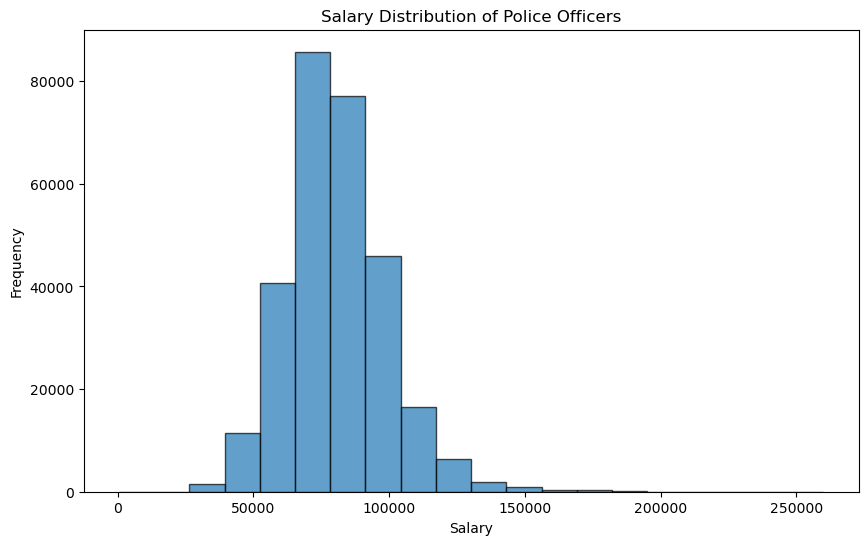

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

# Calculate age from 'birth year'
# current_year = datetime.now().year
# df_final_profiles['age'] = current_year - df_final_profiles['birth_year']

# # Drop NaN values and convert age to integer
# df_final_profiles = df_final_profiles.dropna(subset=['age'])
# df_final_profiles['age'] = df_final_profiles['age'].astype(int)

# Plot the age distribution histogram
plt.figure(figsize=(10, 6))
plt.hist(df_salaries['salary'], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.title("Salary Distribution of Police Officers")
plt.show()


In [41]:
import gzip

gz_file = "./unified_data/complaints/civilian_witnesses.csv.gz"

# with gzip.open(gz_file, 'rt') as f:  # 'rt' mode for text
#     content = f.read()
#     print(content) 

# Read directly into a DataFrame
df_civilian_witnesses = pd.read_csv(gz_file, compression='gzip')
df_civilian_witnesses


,cr_id,birth_year,current_age,gender,race,filename
0,52094,1988,NaN,NaN,NaN,complaints-witnesses_1967-1999_2016-12
1,100256,1946,NaN,NaN,NaN,complaints-witnesses_1967-1999_2016-12
2,100256,1958,NaN,NaN,NaN,complaints-witnesses_1967-1999_2016-12
3,104195,1957,NaN,NaN,NaN,complaints-witnesses_1967-1999_2016-12
4,107181,1948,NaN,NaN,NaN,complaints-witnesses_1967-1999_2016-12
...,...,...,...,...,...,...
91832,314493,NaN,NaN,MALE,NaN,complaints-civilian-witnesses_2000-2023_2023-0...
91833,314752,1935.0,NaN,MALE,ASIAN/PACIFIC ISLANDER,complaints-civilian-witnesses_2000-2023_2023-0...
91834,315021,NaN,NaN,NaN,NaN,complaints-civilian-witnesses_2000-2023_2023-0...
91835,315093,NaN,NaN,MALE,NaN,complaints-civilian-witnesses_2000-2023_2023-0...


In [42]:
df_civilian_witnesses


,cr_id,birth_year,current_age,gender,race,filename
0,52094,1988,NaN,NaN,NaN,complaints-witnesses_1967-1999_2016-12
1,100256,1946,NaN,NaN,NaN,complaints-witnesses_1967-1999_2016-12
2,100256,1958,NaN,NaN,NaN,complaints-witnesses_1967-1999_2016-12
3,104195,1957,NaN,NaN,NaN,complaints-witnesses_1967-1999_2016-12
4,107181,1948,NaN,NaN,NaN,complaints-witnesses_1967-1999_2016-12
...,...,...,...,...,...,...
91832,314493,NaN,NaN,MALE,NaN,complaints-civilian-witnesses_2000-2023_2023-0...
91833,314752,1935.0,NaN,MALE,ASIAN/PACIFIC ISLANDER,complaints-civilian-witnesses_2000-2023_2023-0...
91834,315021,NaN,NaN,NaN,NaN,complaints-civilian-witnesses_2000-2023_2023-0...
91835,315093,NaN,NaN,MALE,NaN,complaints-civilian-witnesses_2000-2023_2023-0...


In [45]:
df_civilian_witnesses["current_age"].dropna()

39915    32.0
39916    46.0
39917    23.0
39920    46.0
39922    29.0
         ... 
91644    46.0
91654    18.0
91657    32.0
91664    70.0
91665    56.0
Name: current_age, Length: 28011, dtype: float64

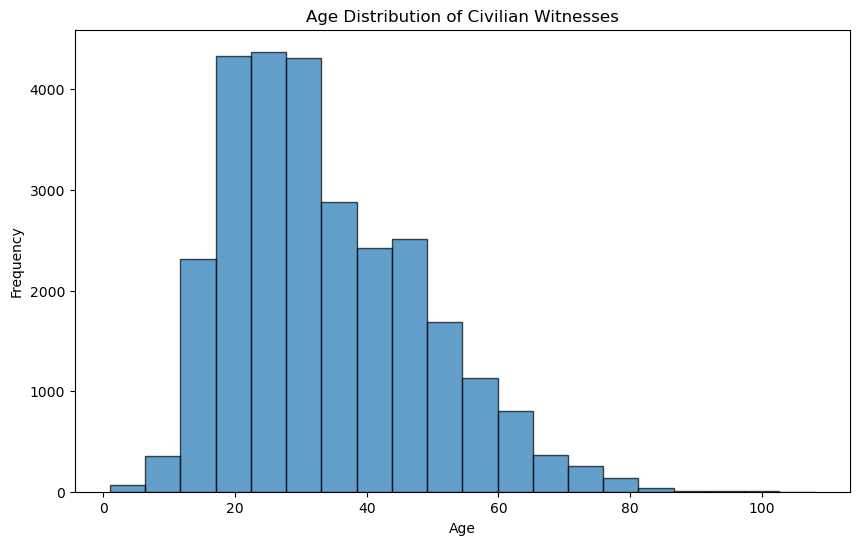

In [47]:
#y = df_victims["race"].value_counts()
y = df_civilian_witnesses["current_age"].dropna()
plt.figure(figsize=(10, 6))
plt.hist(y, bins=20, edgecolor='black', alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution of Civilian Witnesses")
plt.show()


In [49]:
df_civilian_witnesses["race"].dropna().value_counts()

race
BLACK                             29841
WHITE                              9269
HISPANIC                           7354
ASIAN/PACIFIC ISLANDER              613
NATIVE AMERICAN/ALASKAN NATIVE       82
MIDDLE EASTERN/NORTH AFRICAN         31
Name: count, dtype: int64